In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from joblib import dump, load

In [2]:
df=pd.DataFrame(load('output_veg_4M.dat'))

In [3]:
df

,aspect,curvature,elevation,morphology,slope,tree_cover,vegetation,lats,lons,patches,wfall
0,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.854429e+06,387482.461585,0.0,False
1,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.865454e+06,380381.027761,0.0,False
2,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.872562e+06,426336.491331,0.0,False
3,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.837375e+06,421199.433409,0.0,False
4,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.840174e+06,426920.413756,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
3999995,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.860203e+06,412495.852166,0.0,False
3999996,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.841761e+06,380027.774248,0.0,False
3999997,-3.402823e+38,-3.402823e+28,32767.0,7.0,-3.402823e+38,0.0,127.0,4.927474e+06,373403.305606,0.0,False
3999998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.833005e+06,382089.403738,0.0,False


In [4]:
df = df.loc[:,['aspect', 'curvature', 'elevation', 'morphology', 'slope', 'tree_cover','vegetation', 'patches'] ].dropna()

In [5]:
wrong = (df.curvature < -100) |(df.elevation > 4000) | (df.aspect > 1000) |(df.aspect < -1000)| (df.slope > 1000)

In [6]:
df = df[~wrong].reset_index().drop('index', axis=1)

In [7]:
X =df.values

In [8]:
# X = np.load('features.npy')
# y = np.load('group.npy')
features = ['aspect', 'curvature', 'elevation', 'morphology', 'slope', 'tree-cover','vegetation','patches']

In [9]:
X.shape

(614648, 8)

In [4]:
estimators = [
    ('rfc', RandomForestClassifier()),
#     ('lda', LinearDiscriminantAnalysis()),
#     ('qda', QuadraticDiscriminantAnalysis()),
#     ('log', LogisticRegression())
]

params = {
    'rfc': {
        'n_estimators': [200],
        'max_depth': [20],
        'min_samples_split': [2000],
        'class_weight': ['balanced_subsample']
    },
    
    'lda': {
        'n_components': [2,]
    },
    
    'qda': {
        
        
    },
    
    'log': {
        'penalty' : ['l1', 'l2'],
        'C': [1.0, 0.1, 0.01, 0.001],
        'class_weight': ['balanced']
    }
    
}

In [14]:
#X_ = StandardScaler().fit_transform(X[:, [True, False,False, True,True,True,True,True,False]])
X = X[:, [True, False, True, True, True, True, True]]
y = y.astype(int)

In [14]:
results = dict()
for cl_name, clf in estimators:
    gcv = GridSearchCV(clf, param_grid=params[cl_name], n_jobs=14, scoring='balanced_accuracy', verbose=1, cv=5)
    gcv.fit(X_, y)
    print(f"Resutls for {cl_name}.")
    print(f"Balanced accuracy score: {gcv.best_score_}")
    print(f"Confusion matrix: {confusion_matrix(gcv.best_estimator_.predict(X_), y)}")
    results[cl_name] = gcv

Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float32').


In [ ]:
gcv.best_params_

In [ ]:
for f, imp in zip(features[:-1], results['rfc'].best_estimator_.feature_importances_):
    print(f"feature {f}: {imp}.")

In [ ]:
#X_ = StandardScaler().fit_transform(X[:, [True, False,False, True,True,True,True,True,False]])
#y = y.astype(int)

In [19]:
# features = ['aspect', 'curvature-plan', 'curvature-prof', 'curvature', 'elevation', 'morphology', 'slope', 'tree-cover', 'patches']
features = np.array(['aspect',  'elevation', 'morphology', 'slope', 'tree-cover'])

In [20]:
n_features = len(features)

In [21]:
n_features

5

In [22]:
X_.shape

(1429950, 5)

In [23]:
Counter(y)

Counter({0: 944730, 1: 485220})

In [23]:
TP = Counter(y)[1] / 2
TN = Counter(y)[0] / 2
FP = Counter(y)[0] / 2
FN = Counter(y)[1] / 2

In [24]:
(TP/(TP+FN) + TN/(TN+FP))/2

0.5

In [25]:
results = []
clf = RandomForestClassifier(**{'class_weight': 'balanced_subsample',
 'max_depth': 20,
 'min_samples_split': 4000,
 'n_estimators': 10})
clf.fit(X_, y)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       min_samples_split=4000, n_estimators=10)

In [28]:
dump(clf, 'rf_clf.joblib') 

['rf_clf.joblib']

In [ ]:
results = []
clf = RandomForestClassifier(**{'class_weight': 'balanced_subsample',
 'max_depth': 20,
 'min_samples_split': 4000,
 'n_estimators': 10})
for j in range(2, 2 ** n_features - 1):
    print(j)
    mask = np.array(list(format(j, f'#0{n_features + 2}b')[2:]), dtype=int).astype(bool)
    if sum(mask) > 2:
        errors = cross_val_score(clf, X_[:, mask], y, n_jobs=14,scoring='balanced_accuracy')
        results.append((mask, errors))
        # print(f"Trying features {np.array(features)[mask]}: mean={errors.mean()}, std={errors.std()}.")

In [ ]:
features  

In [ ]:
for ffs, vals in sorted(results, key=lambda x: x[1].mean(), reverse=True):
    print(features[ffs], vals.mean())

In [ ]:
cross_val_score(clf, X_, y, n_jobs=14,scoring='balanced_accuracy')

In [ ]:
comm = []
for ffs, vals in filter(lambda x: x[1].mean()>0.69,results):
    comm.append(features[ffs].tolist())

In [ ]:
from functools import reduce

In [ ]:
reduce(lambda x, y: x.intersection(y), map(set, comm))

{'aspect', 'morphology', 'tree-cover'} -- эти предикторы всегда были в лучших результатах. Они обязательно должны быть, чтобы попытка угадать упадет ли лес в данной точке была хотя бы немного успешной... фактически это общие предикторы для все лучших случаев, т.е. тех случаев, у которых средняя точность, вычисленная по пяти случайным разбиением исходных данных на тестовую и проверочную, оказалась выше 0.69. 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


<AxesSubplot: >

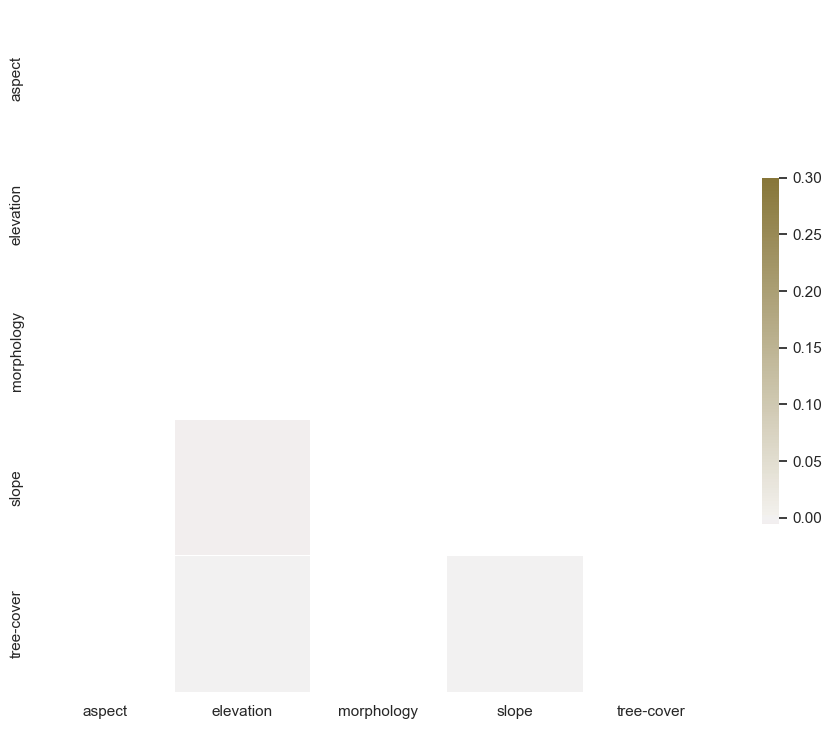

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = np.corrcoef(X_.T)
corr = pd.DataFrame(corr, index=features, columns=features)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(7, 70, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
feature_imp={
'aspect': 0.38636324856410287,
# 'curvature-plan': 0.022507389222992558,
# 'curvature-prof': 0.032563402846718686,
'curvature': 0.019680834593444985,
'elevation': 0.09614325902426059,
'morphology': 0.1658324173616787,
'slope': 0.04549242135125633,
'tree-cover': 0.23141702703554537}

In [ ]:
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(feature_imp))
performance = [val for k,val in feature_imp.items()]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_imp.keys())
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Performance')
#ax.set_title('How fast do you want to go today?')


In [ ]:
corr

In [ ]:
from yellowbrick.features.radviz import radviz

radviz(pd.DataFrame(X_, columns=features), y, classes=[0, 1], alpha=0.3)

In [ ]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt


In [ ]:
inds = np.random.randint(0, len(y), size=1000)
y_=y[inds]

In [ ]:
similarities = euclidean_distances(X_[inds,:-1])

In [ ]:
seed=42
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=-1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=-1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

In [ ]:
s = 100
plt.scatter(npos[y_==0, 0], npos[y_==0, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.scatter(npos[y_==1, 0], npos[y_==1, 1], color='blue', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

In [ ]:
s = 100
plt.scatter(pos[y_==0, 0], pos[y_==0, 1], color='darkorange', s=s, lw=0, label='MDS')
plt.scatter(pos[y_==1, 0], pos[y_==1, 1], color='blue', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

Построим-ка одно деревце решений

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
X_ = StandardScaler().fit_transform(X[:, :-1])
y = y.astype(int)
clf = DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')
clf.fit(X[:, :-1], y)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf,
                           feature_names=features[:-1],
                           out_file=None,
                           filled=True,
                           rounded=True,proportion=True)

#Export to pdf
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_pdf('tree.pdf')

Cross-tab between values 

In [15]:
X[np.isinf(X)]=0
X[X[:,1] == 32768.0, 1]=0

In [16]:
patch_bins = np.histogram(X[:,1], bins=15)[1]


In [17]:
patch_bins.tolist()

[0.0,
 42.6,
 85.2,
 127.80000000000001,
 170.4,
 213.0,
 255.60000000000002,
 298.2,
 340.8,
 383.40000000000003,
 426.0,
 468.6,
 511.20000000000005,
 553.8000000000001,
 596.4,
 639.0]

In [18]:
Counter(np.digitize(X[:, 1], patch_bins))

Counter({2: 415455,
         4: 219932,
         1: 224377,
         3: 348887,
         5: 87354,
         8: 15456,
         7: 29794,
         9: 12568,
         6: 54940,
         10: 9675,
         12: 2592,
         11: 7397,
         13: 722,
         14: 623,
         15: 128,
         16: 50})

In [56]:
X[:,0].max()

359.7821350097656

In [20]:
patch_bins = np.histogram(X[:,5], bins=10)[1] 

In [21]:
patch_bins

array([     0.     ,  43402.74375,  86805.4875 , 130208.23125,
       173610.975  , 217013.71875, 260416.4625 , 303819.20625,
       347221.95   , 390624.69375, 434027.4375 ])

In [10]:
features

['aspect',
 'curvature',
 'elevation',
 'morphology',
 'slope',
 'tree-cover',
 'vegetation',
 'patches']

In [11]:
from itertools import combinations
#features = ['aspect', 'elevation', 'morphology', 'slope', 'tree-cover', 'patches']

for k in range(len(features)):
    for i in range(k+1, len(features)):
        if features[k]=='patches' or features[i]=='patches': continue
        print(f'Processing: {features[k]}_{features[i]}...')
        aspect_bins = np.histogram(X[:,k], bins=10)[1] if features[k]!='morphology' and  features[k]!='vegetation' else np.unique(X[:, k])
        patch_bins = np.histogram(X[:,i], bins=10)[1] if features[i]!='morphology'and  features[i]!='vegetation' else np.unique(X[:, i])
        
        cst = pd.crosstab(np.digitize(X[:,k], aspect_bins) if features[k]!='morphology' and  features[k]!='vegetation' else X[:,k], np.digitize(X[:, i], patch_bins) if features[i]!='morphology' and features[i]!='vegetation' else X[:,i])
        col_names = list(patch_bins) + [np.inf]
        col_repr = [f'{col_names[j]:2.2f}-{col_names[j+1]:2.2f}' for j in range(len(col_names)-1)]

        row_names = list(aspect_bins) + [np.inf]
        row_repr = [f'{row_names[j]:2.2f}-{row_names[j+1]:2.2f}' for j in range(len(row_names)-1)]
        print('col_repr:',cst)
        df = cst.reset_index().drop(['row_0'], axis=1).set_axis(col_repr , axis=1).set_axis(row_repr, axis=0)
        df.to_csv(f'{features[k]}_{features[i]}.csv')
        

Processing: aspect_curvature...
col_repr: col_0  1   2   3    4     5      6     7    8   9   10  11
row_0                                                     
1       0   1   5   71  5797  72057  2022   29   2   2   1
2       0   4   4   28  3804  54199  1263   15   2   0   0
3       0   1   0   13  2920  46290  1012   10   0   0   0
4       0   0   1   26  3499  51997  1227   19   1   0   0
5       0   0   2   23  5020  70667  1698   19   0   0   0
6       0   0   1   46  5691  77589  1889   12   1   0   0
7       0   0   2   15  3720  49360  1332    5   2   0   0
8       0   1   3   39  3070  38020  1214   20   2   0   0
9       1   7  30  149  3788  41041  1576  100  22   4   0
10      1   5  13  103  5471  54304  2173   68   5   1   0
11      0   0   0    0     1      0     0    0   0   0   0
Processing: aspect_elevation...
col_repr: col_0     1      2     3     4     5    6    7    8    9   10  11
row_0                                                            
1      50612  152

col_repr: col_0  1.0    2.0    3.0    4.0    5.0    6.0     7.0    8.0    9.0   10.0
row_0                                                                     
1       148  13012  51192  15153  83444  53370  131570  12775  14512   107
2       105   7008  15455  11734  54721  12345    9921   8815   5115    14
3        36   2612   4802   5686  28030   4379    3552   4362   1863     8
4        13   1008   1512   3504  16604   1023     472   2838    759     0
5         6    545    503   2184   9567    230      61   1511    367     0
6         8    254    199   1087   5141    141      25    682    114     0
7         1    135    229    454   3176    176     103    242     29     0
8         0     75     16    177   1511     14       2     86     14     0
9         2     57    228     99    747    249     307     35     14     0
10        0     22      7     40    175      4       2      5      8     1
11        0      2      0      0      0      0       0      0      0     0
Processing: ele

In [185]:
cst.reindex(range(1, 12), axis=1).fillna(0)

col_0,1,2,3,4,5,6,7,8,9,10,11
row_0,,,,,,,,,,,
1,197687,84,13,18,0,8,0.0,0.0,0.0,4,6
2,172553,38,10,6,0,3,0.0,0.0,0.0,5,3
3,146524,41,2,4,1,0,0.0,0.0,0.0,2,0
4,161692,51,6,5,2,2,0.0,0.0,0.0,3,1
5,195116,45,5,3,4,0,0.0,0.0,0.0,1,0
6,175314,44,5,6,3,3,0.0,0.0,0.0,0,0
7,102002,21,3,1,3,0,0.0,0.0,0.0,0,0
8,76494,15,12,3,1,3,0.0,0.0,0.0,0,2
9,78945,51,7,0,1,5,0.0,0.0,0.0,0,0


In [154]:
df.set_axis(map(str, patch_bins), axis=1)

,0.0,63.9,127.8,191.7,255.6,319.5,383.4,447.3,511.2,575.1,639.0
-1.00-35.08,197820,0,0,0,0,0,0,0,0,0,0
35.08-71.15,0,172618,0,0,0,0,0,0,0,0,0
71.15-107.23,0,0,146574,0,0,0,0,0,0,0,0
107.23-143.30,0,0,0,161762,0,0,0,0,0,0,0
143.30-179.38,0,0,0,0,195174,0,0,0,0,0,0
179.38-215.45,0,0,0,0,0,175375,0,0,0,0,0
215.45-251.53,0,0,0,0,0,0,102030,0,0,0,0
251.53-287.60,0,0,0,0,0,0,0,76530,0,0,0
287.60-323.68,0,0,0,0,0,0,0,0,79009,0,0
323.68-359.75,0,0,0,0,0,0,0,0,0,123018,0


In [88]:
cst

sdf,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
row_0,,,,,,,,,,,,,,,,
1,31476,56876,48984,31757,11913,6482,3823,1869,1490,1370,1229,248,100,197,6,0
2,32816,51008,45024,23463,9109,4253,2261,1989,1123,888,651,9,24,0,0,0
3,26227,46315,38654,19323,7485,4101,1424,907,884,590,590,48,26,0,0,0
4,25409,50047,41907,22829,9445,6126,2598,1155,714,547,840,95,50,0,0,0
5,30485,61188,42806,27318,12386,10054,5475,1740,1499,1006,762,355,0,0,50,50
6,27440,51919,38322,26908,10761,8184,4215,2398,2008,1293,1212,661,54,0,0,0
7,14739,27986,24371,14921,7136,5391,2149,1773,1244,1220,748,322,0,30,0,0
8,10264,18746,19065,14323,4644,3870,2593,916,785,599,424,159,42,50,50,0
9,10094,19713,19624,15828,5626,2558,1707,1171,1216,574,303,222,275,98,0,0


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(cst)

In [ ]:
#features = ['aspect', 'curvature', 'elevation', 'morphology', 'slope', 'tree-cover', 'patches']

In [ ]:
X_.shape

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df = pd.DataFrame(X_, columns=features)
df.morphology = df.morphology.astype(int)
df['y'] = y
df.y = df.y.map({True: 'W', False: 'F'})
#df = df[df['tree-cover'] > 20]

In [ ]:
df

In [ ]:
box_features = ['aspect',  'curvature', 'elevation', 'slope', 'tree-cover']

In [ ]:
for feature in box_features:
    plt.figure(figsize=(15,10))
    sns.set(font_scale=2)
    sns.boxplot(x="morphology", y=feature,
                hue="y", palette= ["#8de5a1", "#a1c9f4"],
                data=df, fliersize=0)
    plt.legend([],[], frameon=False)
    if feature.startswith('curvature'):
         plt.gca().set(ylim=(-5, 5))
    if feature.startswith('curvature-plan'):
         plt.gca().set(ylim=(-3.5, 3.5))
    if feature.startswith('curvature-prof'):
         plt.gca().set(ylim=(-3.0, 3.0))
    if feature.startswith('slope'):
         plt.gca().set(ylim=(-5, 45))
    if feature.startswith('tree-cover'):
         plt.gca().set(ylim=(40, 105))
    plt.gcf().savefig(f'{feature}.png', dpi=300)
    
    

In [ ]:
df['curvature'][(df.morphology == 7)*(df.y == 'F')]

In [ ]:
from scipy import stats as st

In [ ]:
for feature in box_features:
    for val in np.unique(df.morphology):
        a = df[feature][(df.y=='F')&(df.morphology == val)]
        b = df[feature][(df.y=='W')&(df.morphology == val)]
        print(f"{feature}, morphology = {val}: {st.mannwhitneyu(a, b)}")

In [ ]:
df

In [ ]:
df = pd.DataFrame(X, columns=features)
df.morphology = df.morphology.astype(int)
df['y'] = y
df.y = df.y.map({True: 'W', False: 'F'})
df = df[df['tree-cover'] > 20]
df['area'] = np.digitize(df['tree-cover'].values, [0, 40, 80, 300])


In [ ]:
for feature in box_features:
    plt.figure(figsize=(15,10))
    sns.set(font_scale=2)
    sns.boxplot(x="morphology", y=feature,
                hue="area", palette= ["#8de5a1", "#a1c9f4" , "coral"],
                data=df, fliersize=0)
    plt.legend([],[], frameon=False)
    if feature.startswith('curvature'):
         plt.gca().set(ylim=(-5, 5))
    if feature.startswith('curvature-plan'):
         plt.gca().set(ylim=(-3.5, 3.5))
    if feature.startswith('curvature-prof'):
         plt.gca().set(ylim=(-3.0, 3.0))
    if feature.startswith('slope'):
         plt.gca().set(ylim=(-5, 45))
    if feature.startswith('tree-cover'):
         plt.gca().set(ylim=(40, 105))
    plt.gcf().savefig(f'{feature}-ss3.png', dpi=300)
    

In [ ]:
df

In [ ]:
zz

In [ ]:
// x = {'a': {'b':1, 'c':2}, 'd':4 } 